In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

In [37]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train[0].shape

(28, 28)

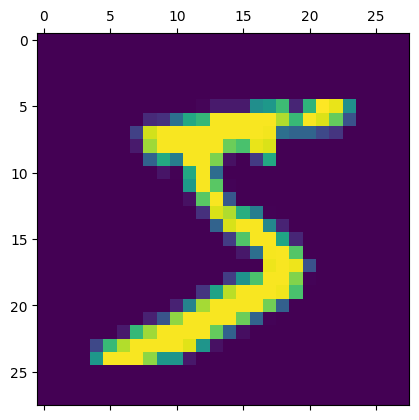

In [7]:
#Matplotlib to see actual digit represented by these 0 to 255 values (0=black, 255=white)
plt.matshow(X_train[0])

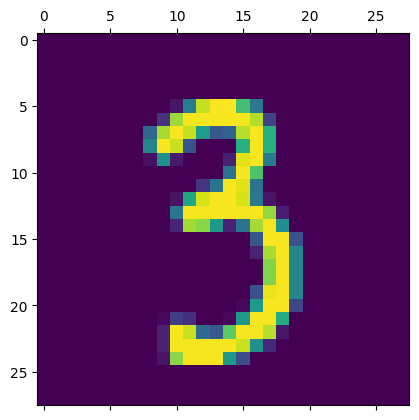

In [8]:
plt.matshow(X_train[98])

In [9]:
y_train[0]

5

In [10]:
y_train[98]

3

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Flattening our input - Converting every digit (2D array) to 1D array

In [12]:
X_train.shape #But we want shape to be (60000,784)

(60000, 28, 28)

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
#Similarly
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Creating basic NN with one input layer(784) and one ouput layer(10)

In [16]:
#trying with scaled input values - Scaling all the values(0-255) to 0-1
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

Optimizing Neural Network (256->128->64)

In [19]:
model = keras.Sequential([
    keras.layers.Input(shape = (784,)),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8842 - loss: 0.3816
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9711 - loss: 0.0943
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0565
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0481
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0373
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0292
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0272
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0230
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0265
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0182
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.0179
Epoch 12/30
1875/1875 ━━━━━━━━

In [20]:
loss,accuracy = model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.1629


In [21]:
y_predict2 = model.predict(X_test_flattened)
predicted2 = []
for i in range(len(y_predict2)):
    predicted2.append(np.argmax(y_predict2[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(50.722222222222214, 0.5, 'Truth')

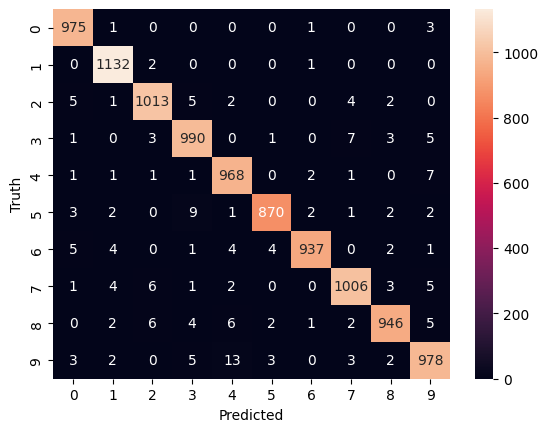

In [23]:
import seaborn as sn
cm2 = tf.math.confusion_matrix(labels=y_test, predictions = predicted2)
sn.heatmap(cm2, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [42]:
print("Accuracy of Model :",accuracy*100)
print("Total loss of Model : ",loss)

Accuracy of Model : 98.15000295639038
Total loss of Model :  0.12408456951379776


In [43]:
model.save("mnist_model.keras")  # Recommended way

In [40]:
image = X_test[1]  # Use a test image from MNIST
image = image.reshape(1, 784) / 255  # Preprocess it just like your input image
prediction = model.predict(image)
predicted_class = np.argmax(prediction)
print(f"Predicted digit: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted digit: 2


In [41]:
y_test[1]

2

In [ ]:
X_test